### Cogs 189 Final Project: EEG Seizure Detection using ML 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

y

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

In [2]:
data = pd.read_csv("data/Epileptic Seizure Recognition.csv")
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [3]:
data['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

### Cleaning: Since I am only interested in seizure detection(1), I would change all other y values to 0 (not seizure) and leave 1(seizure) as it is now.

In [4]:
data['y'] = data['y'] == 1
data['y'] = data['y'].astype(int)
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,0


### Visualize the output distribution

In [5]:
data['y'].value_counts()

0    9200
1    2300
Name: y, dtype: int64

<AxesSubplot:ylabel='Frequency'>

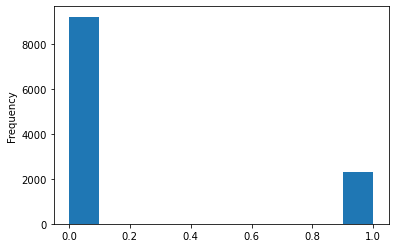

In [6]:
data['y'].plot(kind='hist')

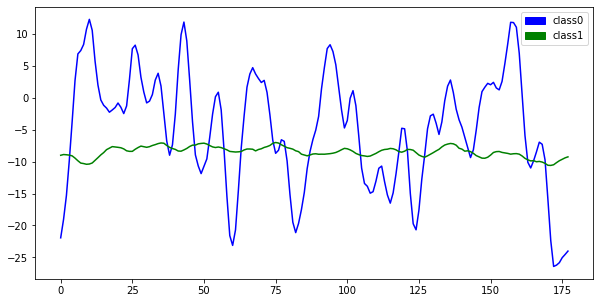

In [7]:
dfy = data.groupby("y")
df1 = dfy.get_group(1)
df0 = dfy.get_group(0)
X1 = df1.iloc[:,1:179].values
X0 = df0.iloc[:,1:179].values
avg1 = X1.mean(axis = 0)
avg0 = X0.mean(axis = 0)
blue = mpatches.Patch(color='b', label = 'class0')
green = mpatches.Patch(color='g', label = 'class1')
plt.figure(figsize = (10, 5))
plt.legend(handles = [blue, green])
plt.plot(avg1, 'b', avg0, 'g')

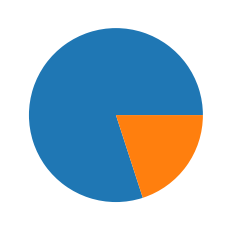

In [8]:
plt.pie(data['y'].value_counts())
plt.show()

### Split data into training/testing set:  80-20 split

In [9]:
data.columns

Index(['Unnamed', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)

In [10]:
X = data.iloc[:,1:179].values
Y = data.iloc[:,179].values

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2)

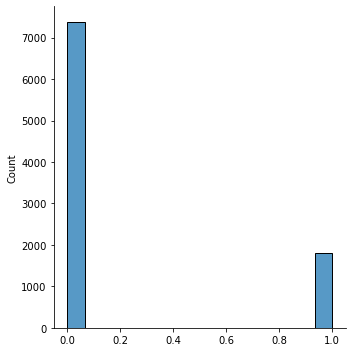

In [13]:
sns.displot(Y_train, kde=False)

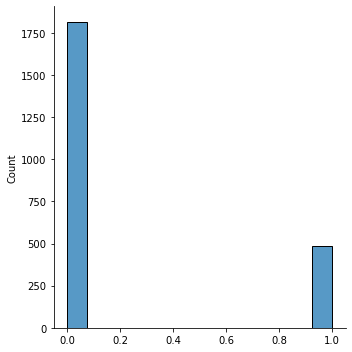

In [14]:
sns.displot(Y_test, kde=False)

In [15]:
X_train.shape

(9200, 178)

In [16]:
Y_train.shape

(9200,)

### Now, I will apply several Machine Learning Algorithms to perform classification:
<li>Logistic Regression<li>Decision Tree<li>Naive Bayes<li>MLP<li>KNN<li>Linear SVM<li>SVM<li>Random Forest<li>LDA<li>SGD<li>Ridge Regression<li>Gradient Boosting

In [17]:
model_accuracy = {}

### 1. Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr_param = {
    'penalty': ['l2', 'elasticnet'],
    'dual': [False, True],
    'C': [1.0, 2.0],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 110, 120]
}
lr_grid = GridSearchCV(lr, lr_param, cv=3)
lr_grid.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 2.0], 'dual': [False, True],
                         'max_iter': [100, 110, 120],
                         'penalty': ['l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear']})

In [19]:
lr_model = lr_grid.best_estimator_
lr_model

LogisticRegression(C=2.0, dual=True, max_iter=110, solver='liblinear')

In [20]:
LR_train_accuracy = lr_model.score(X_train, Y_train)
print("Logistic Regression training accuracy: ", LR_train_accuracy)
LR_test_accuracy = lr_model.score(X_test, Y_test)
print("Logistic Regression testing accuracy: ", LR_test_accuracy)

Logistic Regression training accuracy:  0.8547826086956521
Logistic Regression testing accuracy:  0.8369565217391305


In [21]:
model_accuracy['Logistic Regression'] = LR_test_accuracy

### 2. Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Hyperparameter tuning

DTC = DecisionTreeClassifier(random_state = 10)
params = {'max_depth': np.arange(1, 10, 1),
          'criterion': ['gini', 'entropy']
         }
grid_search = GridSearchCV(estimator = DTC, param_grid = params, cv = 5, verbose=True)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=True)

In [23]:
DTC_model = grid_search.best_estimator_
DTC_model

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=10)

In [25]:
DTC_model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=10)

In [26]:
DTC_train_accuracy = DTC_model.score(X_train, Y_train)
print("Depth " + str(DTC_model.get_depth()) + " Decision Tree training accuracy: ", DTC_train_accuracy)
DTC_test_accuracy = DTC_model.score(X_test, Y_test)
print("Depth " + str(DTC_model.get_depth()) + " Decision Tree testing accuracy: ", DTC_test_accuracy)

Depth 9 Decision Tree training accuracy:  0.9723913043478261
Depth 9 Decision Tree testing accuracy:  0.9265217391304348


In [27]:
model_accuracy['Decision Tree'] = DTC_test_accuracy

### 3. Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB()

In [29]:
GB_train_accuracy = GNB.score(X_train, Y_train)
print("Gaussian Naive Bayes training accuracy: ", GB_train_accuracy)
GB_test_accuracy = GNB.score(X_test, Y_test)
print("Gaussian Naive Bayes testing accuracy: ", GB_test_accuracy)

Gaussian Naive Bayes training accuracy:  0.9578260869565217
Gaussian Naive Bayes testing accuracy:  0.9547826086956521


In [30]:
model_accuracy['Naive Bayes'] = GB_test_accuracy

### 4. Multi-Layer Perceptron

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
parameter = {
    'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,)],
    'solver': ['sgd', 'adam'],
    'alpha': [0.05],
    'activation': ['logistic', 'tanh', 'relu']}

MLP = MLPClassifier(random_state=100, max_iter=50)
MLP_grid = GridSearchCV(MLP, parameter, cv=2)
MLP_grid.fit(X_train, Y_train)

GridSearchCV(cv=2, estimator=MLPClassifier(max_iter=50, random_state=100),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.05],
                         'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,)],
                         'solver': ['sgd', 'adam']})

In [33]:
MLP_model = MLP_grid.best_estimator_
MLP_model

MLPClassifier(alpha=0.05, hidden_layer_sizes=(4,), max_iter=50,
              random_state=100, solver='sgd')

In [34]:
MLP_model.fit(X_train, Y_train)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(4,), max_iter=50,
              random_state=100, solver='sgd')

In [35]:
MLP_train_accuracy = MLP_model.score(X_train, Y_train)
print("Multi-Layer Perceptron training accuracy: ", MLP_train_accuracy)
MLP_test_accuracy = MLP_model.score(X_test, Y_test)
print("Multi-Layer Perceptron testing accuracy: ", MLP_test_accuracy)

Multi-Layer Perceptron training accuracy:  0.9601086956521739
Multi-Layer Perceptron testing accuracy:  0.9360869565217391


In [36]:
model_accuracy['MLP'] = MLP_test_accuracy

### 5. KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn_grid = GridSearchCV(knn, {'n_neighbors': np.arange(2, 20)}, cv=5)
knn_search = knn_grid.fit(X_train, Y_train)

In [38]:
knn_search.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [39]:
knn_model = knn_search.best_estimator_
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
knn_train_accuracy = knn_model.score(X_train, Y_train)
print("KNN training accuracy: ", knn_train_accuracy)
knn_test_accuracy = knn_model.score(X_test, Y_test)
print("KNN testing accuracy: ", knn_test_accuracy)

KNN training accuracy:  0.9585869565217391
KNN testing accuracy:  0.92


In [41]:
model_accuracy['KNN'] = knn_test_accuracy

### 6. Linear SVM

In [42]:
from sklearn.svm import LinearSVC

In [43]:
linear_svm = LinearSVC()
C = [0.001, .01, .1, 1, 10]
params = {'C': C}
linear_svm = GridSearchCV(linear_svm, params, cv = 3)
linear_svm.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LinearSVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [44]:
linear_svm.best_params_

{'C': 0.001}

In [45]:
linear_svm_model = linear_svm.best_estimator_
linear_svm_model

LinearSVC(C=0.001)

In [46]:
linear_svm_train_accuracy = linear_svm_model.score(X_train, Y_train) 
print('Linear SVM training accuracy: ', linear_svm_train_accuracy)
linear_svm_test_accuracy = linear_svm_model.score(X_test, Y_test) 
print('Linear SVM testing accuracy: ', linear_svm_test_accuracy)

Linear SVM training accuracy:  0.8495652173913043
Linear SVM testing accuracy:  0.8326086956521739


In [47]:
model_accuracy['Linear SVM'] = linear_svm_test_accuracy

### 7. SVM

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC()
svm_param = {'kernel': ['rbf', 'poly'], 'gamma': ['scale', 10, 1, 0.1, 0.01, 0.001],
                     'C': [0.01, 0.1, 1, 10]}
                   
svm = GridSearchCV(svm, svm_param, cv = 3)
svm.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': ['scale', 10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']})

In [50]:
svm.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [51]:
svm_model = svm.best_estimator_
svm_model.fit(X_train, Y_train)

SVC(C=10)

In [52]:
svm_train_accuracy = svm_model.score(X_train, Y_train)
print("SVM training accuracy: " , svm_train_accuracy)
svm_test_accuracy = svm_model.score(X_test, Y_test)
print("SVM testing accuracy: " , svm_test_accuracy)

SVM training accuracy:  0.9980434782608696
SVM testing accuracy:  0.9760869565217392


In [53]:
model_accuracy['SVM'] = svm_test_accuracy

### 8. Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier()
rfc_param = {
             'max_depth': [4, 6, 8],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [1.0, 2, 4],
             'n_estimators': [10, 12, 14]}
rfc = GridSearchCV(rfc, rfc_param, cv=3)
rfc.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1.0, 2, 4],
                         'n_estimators': [10, 12, 14]})

In [56]:
rfc_model = rfc.best_estimator_
rfc_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=10)

In [57]:
rfc_train_accuracy = rfc_model.score(X_train, Y_train)
print("Random Forest training accuracy: " , rfc_train_accuracy)
rfc_test_accuracy = rfc_model.score(X_test, Y_test)
print("Random Forest testing accuracy: " , rfc_test_accuracy)

Random Forest training accuracy:  0.9691304347826087
Random Forest testing accuracy:  0.9482608695652174


In [58]:
model_accuracy['Random Forest'] = rfc_test_accuracy

### 9. LDA

In [59]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [60]:
lda = LinearDiscriminantAnalysis()
lda_param = {
            'solver': ['svd', 'lsqr', 'eigen'],
            'shrinkage': [None, 'auto']
}
lda = GridSearchCV(lda, lda_param, cv=3)
lda.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [None, 'auto'],
                         'solver': ['svd', 'lsqr', 'eigen']})

In [61]:
lda_model = lda.best_estimator_
lda_model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [62]:
lda_train_accuracy = lda_model.score(X_train, Y_train)
print("Linear Discriminant Analysis training accuracy: ", lda_train_accuracy)
lda_test_accuracy = lda_model.score(X_test, Y_test)
print("Linear Discriminant Analysis testing accuracy: ", lda_test_accuracy)

Linear Discriminant Analysis training accuracy:  0.8339130434782609
Linear Discriminant Analysis testing accuracy:  0.808695652173913


In [63]:
model_accuracy['LDA'] = lda_test_accuracy

### 10. SGD

In [64]:
from sklearn.linear_model import SGDClassifier

In [65]:
sgd = SGDClassifier()
sgd_param = {'loss': ['hinge', 'log', 'perceptron'],
             'penalty': ['l2', 'l1', 'elasticnet'],
             'alpha': [0.0001, 0.001, 0.01]}
sgd = GridSearchCV(sgd, sgd_param, cv=3)
sgd.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=SGDClassifier(),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'loss': ['hinge', 'log', 'perceptron'],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [66]:
sgd_model = sgd.best_estimator_
sgd_model.fit(X_train, Y_train)

SGDClassifier(alpha=0.01, penalty='elasticnet')

In [67]:
sgd_train_accuracy = sgd_model.score(X_train, Y_train)
print("Stochastic gradient descent training accuracy: ", sgd_train_accuracy)
sgd_test_accuracy = sgd_model.score(X_test, Y_test)
print("Stochastic gradient descent testing accuracy: ", sgd_test_accuracy)

Stochastic gradient descent training accuracy:  0.8245652173913044
Stochastic gradient descent testing accuracy:  0.8073913043478261


In [68]:
model_accuracy['SGD'] = sgd_test_accuracy

### 11. Ridge regression

In [69]:
from sklearn.linear_model import RidgeClassifier

In [70]:
ridge = RidgeClassifier()
ridge_param = {'alpha': [0.001, 0.01, 0.1, 1],
               'solver': ['auto', 'svd', 'lsqr']}
ridge = GridSearchCV(ridge, ridge_param, cv=3)
ridge.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1],
                         'solver': ['auto', 'svd', 'lsqr']})

In [71]:
ridge_model = ridge.best_estimator_
ridge_model.fit(X_train, Y_train)

RidgeClassifier(alpha=0.001)

In [72]:
ridge_train_accuracy = ridge_model.score(X_train, Y_train)
print("Ridge Regression training accuracy: ", ridge_train_accuracy)
ridge_test_accuracy = ridge_model.score(X_test, Y_test)
print("Ridge Regression testing accuracy: ", ridge_test_accuracy)

Ridge Regression training accuracy:  0.8235869565217391
Ridge Regression testing accuracy:  0.8039130434782609


In [73]:
model_accuracy['Ridge Regression'] = ridge_test_accuracy

### 12. Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
grad_boost = GradientBoostingClassifier()
grad_param = {'loss': ['deviance', 'exponential'],
             'learning_rate': [0.001, 0.01, 0.1],
             'criterion': ['friedman_mse', 'mse', 'squared_error']}
grad_boost = GridSearchCV(grad_boost, grad_param , cv=3)
grad_boost.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'squared_error'],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['deviance', 'exponential']})

In [76]:
gradboost_model = grad_boost.best_estimator_
gradboost_model.fit(X_train, Y_train)

GradientBoostingClassifier()

In [77]:
gradboost_train_accuracy = gradboost_model.score(X_train, Y_train)
print("Gradient Boosting training accuracy: ", gradboost_train_accuracy)
gradboost_test_accuracy = gradboost_model.score(X_test, Y_test)
print("Gradient Boosting testing accuracy: ", gradboost_test_accuracy)

Gradient Boosting training accuracy:  0.9865217391304347
Gradient Boosting testing accuracy:  0.9617391304347827


In [84]:
model_accuracy['Gradient Boosting'] = gradboost_test_accuracy

### Pick the best model

In [85]:
def best_model(lst_model):
    max_key = max(lst_model, key=lst_model.get)
    return max_key
print("The best model for classifying this EEG dataset is", best_model(model_accuracy), "with test accuracy of", 
      str(round(model_accuracy[best_model(model_accuracy)], 4)*100) + "%")

The best model for classifying this EEG dataset is SVM with test accuracy of 97.61%


### Visualize all Model Accuracy

In [86]:
model = pd.DataFrame(columns=['Model', 'Accuracy'])
model['Model'] = model_accuracy.keys()
model['Accuracy'] = model_accuracy.values()

In [87]:
model

,Model,Accuracy
0,Logistic Regression,0.836957
1,Decision Tree,0.926522
2,Naive Bayes,0.954783
3,MLP,0.936087
4,KNN,0.920000
5,Linear SVM,0.832609
6,SVM,0.976087
7,Random Forest,0.948261
8,LDA,0.808696
9,SGD,0.807391


<AxesSubplot:xlabel='Model'>

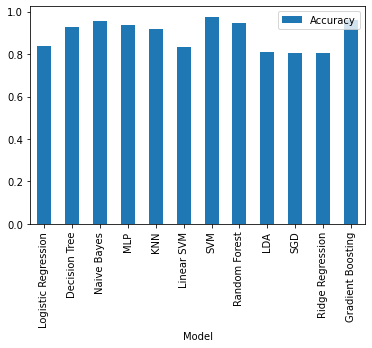

In [88]:
model.plot.bar(x = 'Model', y = 'Accuracy')

In [89]:
model_by_accuracy = model.sort_values(by=['Accuracy'], ascending=False)
model_by_accuracy['Accuracy'] = model_by_accuracy['Accuracy'].apply(lambda x: str(round(x*100, 4)) + "%")

In [90]:
model_by_accuracy

,Model,Accuracy
6,SVM,97.6087%
11,Gradient Boosting,96.1739%
2,Naive Bayes,95.4783%
7,Random Forest,94.8261%
3,MLP,93.6087%
1,Decision Tree,92.6522%
4,KNN,92.0%
0,Logistic Regression,83.6957%
5,Linear SVM,83.2609%
8,LDA,80.8696%
